# Pipeline

- Import Packages
- Import Data (train, test, sample_submission)
- Check Data
- Check Target Feature
- Partition Data into y and X (train, test)
- Extract numerical and categorical feature names
- Validation Strategy – train test split
- Pre-processing framework (Basic)
- Build Model and Make Predictions
- Make and Export Submission File

# Critical Thinking (Asking Questions)

- Why
- What
- When
- How
- Where 

# 1/ Import Packages

In [11]:
# Importing necessary packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# 2/ Import Data

In [2]:
# Read train data
train_path = 'input/train.csv'
train = pd.read_csv(train_path)

# Read test data
test_path = 'input/test.csv'
test = pd.read_csv(test_path)

# Read sample submission data
submission_path = 'input/sample_submission.csv'
submission = pd.read_csv(submission_path)

# 3/ Check Data
Checking data is a crucial step in the data analysis process, especially when working with datasets in data science. It helps you understand the structure and content of your data, identify potential issues, and make informed decisions about preprocessing, cleaning, and analysis. Here's why and how to check data, presented in bullet points, along with code examples:

**Why Check Data:**

- **Data Quality:** Ensures data is accurate, consistent, and reliable.
- **Data Exploration:** Helps you understand the distribution of features and target variables.
- **Missing Values:** Identifies missing or null values that might need to be handled.
- **Outliers:** Detects unusual or erroneous data points that could impact analysis.
- **Data Types:** Verifies if columns have appropriate data types.
- **Feature Engineering:** Offers insights for creating new features or transformations.

In [4]:
# Display basic information about the DataFrame
print("DataFrame Info:")
print(train.info())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18359 non-null  float64
 3   gender                  14261 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18017 non-null  object 
 6   education_level         17902 non-null  object 
 7   major_discipline        15521 non-null  object 
 8   experience              18300 non-null  object 
 9   company_size            13580 non-null  object 
 10  company_type            13320 non-null  object 
 11  last_new_job            17992 non-null  object 
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(1), int64(3

In [5]:
# Display summary statistics of numeric columns
print("\nSummary Statistics:")
print(train.describe())


Summary Statistics:
        enrollee_id  city_development_index  training_hours        target
count  18359.000000            18359.000000    18359.000000  18359.000000
mean   16729.360096                0.847140       65.899014      0.132088
std     9643.749725                0.110189       60.885300      0.338595
min        1.000000                0.448000        1.000000      0.000000
25%     8378.500000                0.796000       23.000000      0.000000
50%    16706.000000                0.910000       47.000000      0.000000
75%    25148.500000                0.920000       89.000000      0.000000
max    33380.000000                0.949000      336.000000      1.000000


In [7]:
# Display the first few rows of the train DataFrame
print("\nFirst Few Rows:")
train.head()


First Few Rows:


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [8]:
# Check for missing values in the train DataFrame
print("\nMissing Values:")
print(train.isnull().sum())


Missing Values:
enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64


In [9]:
# Check unique values in categorical columns of the train DataFrame
print("\nUnique Values in Categorical Columns:")
for column in train.select_dtypes(include=['object']).columns:
    print(f"{column}: {train[column].unique()}")


Unique Values in Categorical Columns:
city: ['city_149' 'city_83' 'city_16' 'city_64' 'city_100' 'city_21' 'city_114'
 'city_103' 'city_97' 'city_160' 'city_65' 'city_90' 'city_75' 'city_136'
 'city_159' 'city_67' 'city_28' 'city_10' 'city_73' 'city_76' 'city_104'
 'city_27' 'city_30' 'city_61' 'city_99' 'city_41' 'city_142' 'city_9'
 'city_116' 'city_128' 'city_74' 'city_69' 'city_1' 'city_176' 'city_40'
 'city_123' 'city_152' 'city_165' 'city_89' 'city_36' 'city_44' 'city_46'
 'city_45' 'city_134' 'city_93' 'city_180' 'city_162' 'city_84' 'city_138'
 'city_173' 'city_19' 'city_71' 'city_158' 'city_23' 'city_102' 'city_105'
 'city_91' 'city_11' 'city_13' 'city_57' 'city_20' 'city_14' 'city_37'
 'city_115' 'city_50' 'city_167' 'city_12' 'city_143' 'city_126' 'city_77'
 'city_101' 'city_150' 'city_179' 'city_107' 'city_175' 'city_146'
 'city_98' 'city_166' 'city_118' 'city_129' 'city_127' 'city_24' 'city_81'
 'city_26' 'city_139' 'city_94' 'city_70' 'city_145' 'city_157' 'city_111'
 'c

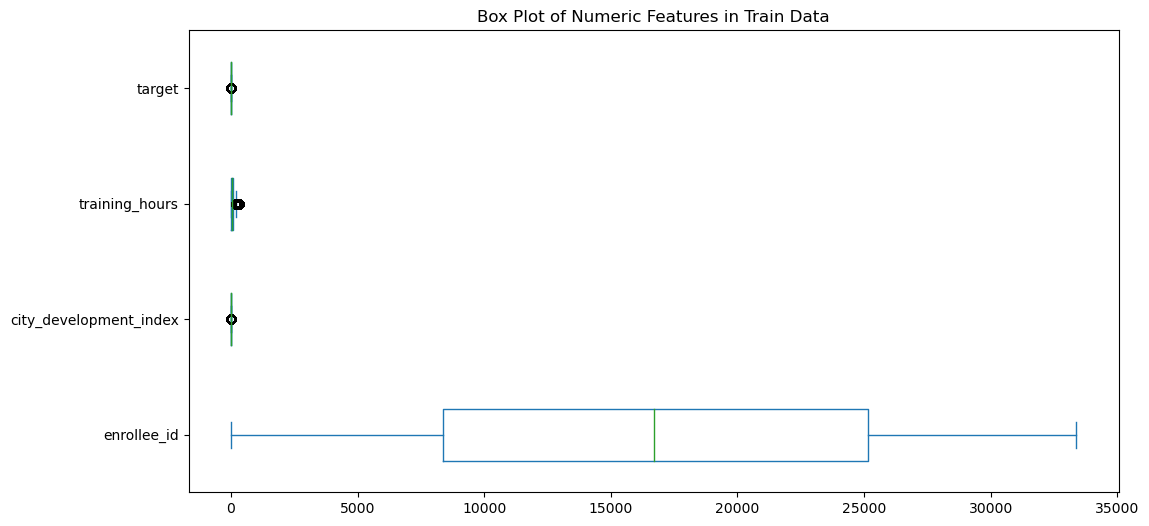

In [12]:
# Check for outliers using box plots in the train DataFrame
train.plot(kind='box', vert=False, figsize=(12, 6))
plt.title("Box Plot of Numeric Features in Train Data")
plt.show()

# 4/ Check Target

In [13]:
# Check class imbalance in the target column
class_counts = train['target'].value_counts()
class_imbalance_percentage = class_counts / len(train) * 100

In [14]:
print("Class Counts:")
print(class_counts)

Class Counts:
0    15934
1     2425
Name: target, dtype: int64


In [15]:
print("\nClass Imbalance Percentage:")
print(class_imbalance_percentage)


Class Imbalance Percentage:
0    86.79122
1    13.20878
Name: target, dtype: float64


# 5/ Partition Data
- y and X (train, test)
- Train Test Split

In [16]:
# Separate the target column from the train data
y = train['target']
X = train.drop(['enrollee_id', 'target'], axis=1)  # Exclude 'enrollee_id' and 'target'

# Split the test data into X_test
X_test = test.drop('enrollee_id', axis=1)  # Exclude 'enrollee_id'

In [17]:
# Split X and y into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Print the shapes of the resulting datasets
print("Shapes of Datasets:")
print("X_train:", X_train.shape)
print("X_val:", X_val.shape)
print("y_train:", y_train.shape)
print("y_val:", y_val.shape)
print("X_test:", X_test.shape)

Shapes of Datasets:
X_train: (14687, 12)
X_val: (3672, 12)
y_train: (14687,)
y_val: (3672,)
X_test: (15021, 12)


# 6/ Extract numerical and categorical feature names

# Pre Processing (Theory)

# 7/ Pre Processing - Getting Started

# Model

# Predict

# Check Accuracy

# Make Submission and Export 